## OLS Regression

In [12]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline

In [3]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df.shape

(788, 20)

In [4]:
print(redfin_df.isnull().sum())

Unnamed: 0                   0
Estimated_market_value       0
Selling_Price                0
Date_Sold                   74
Estimated_Monthly_Cost       2
Estimated_Rental_Value       0
Zipcode                      0
Beds                         0
Bathrooms                    0
Square_Feet                  0
Address                      0
Year_Built                   0
Price_Per_Sqft               1
Lot_Size                     0
Parking_Spaces               0
Monthly_Mortgage_Payment     2
Walk_Score                   0
Estimated_Salesrange_min     0
Estimated_Salesrange_max     0
Company_Adj                  1
dtype: int64


In [5]:
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [6]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN
redfin_df

,Unnamed: 0,Estimated_market_value,Selling_Price,Estimated_Rental_Value,Zipcode,Beds,Bathrooms,Square_Feet,Address,Year_Built,Lot_Size,Parking_Spaces,Walk_Score,Estimated_Salesrange_min,Estimated_Salesrange_max,Company_Adj
0,0,2260062,1950000,5263.43,95070,3,2.0,1249,10612 Gascoigne Dr,1955,5073.00,1,22,2150000.0,2550000.0,Apple_Adj
1,1,1723047,1850000,4115.00,95070,3,2.5,1598,20579 Cedarbrook Ter,1977,2133.00,2,57,1640000.0,1950000.0,Apple_Adj
2,2,1629260,1685000,5374.13,95014,3,2.0,1487,20239 Northwest Sq,1973,1344.00,2,64,1550000.0,1840000.0,Apple
3,3,1813091,1830000,4848.10,94024,3,2.5,1670,10280 Park Green Ln #850,2006,984.00,2,84,1720000.0,2050000.0,Alphabet_Adj
4,4,1163353,1090000,3407.00,95015,3,2.0,1491,10090 Pasadena Ave Unit A4,1985,38577.88,1,73,1110000.0,1320000.0,Apple_Adj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,783,1625000,1625000,4096.00,95125,3,2.0,1716,1018 Pine,1953,6440.00,2,53,1720000.0,2050000.0,Netflix_Adj
783,784,2258708,1765000,4894.00,95125,3,3.0,2231,1466 Gerhardt Ave,1958,8426.00,9999,49,2150000.0,2550000.0,Netflix_Adj
784,785,1229202,1350000,3711.00,95131,3,2.5,1464,1929 Garden Bing Cir,1984,3150.00,6,67,1170000.0,1390000.0,Netflix_Adj
785,786,1074256,1000000,2807.00,95111,3,2.0,990,4883 Snow Dr,1962,7337.00,9999,60,1020000.0,1210000.0,Apple_Adj


In [7]:
values = [30]# remove the rows for bedrooms that are not equal to 3
redfin_df = redfin_df[redfin_df.Beds.isin(values) == False]
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

786

In [8]:
redfin_df.columns

Index(['Unnamed: 0', 'Estimated_market_value', 'Selling_Price',
       'Estimated_Rental_Value', 'Zipcode', 'Beds', 'Bathrooms', 'Square_Feet',
       'Address', 'Year_Built', 'Lot_Size', 'Parking_Spaces', 'Walk_Score',
       'Estimated_Salesrange_min', 'Estimated_Salesrange_max', 'Company_Adj'],
      dtype='object')

In [13]:
formula = 'Selling_Price ~ Company_Adj' # Regression to see the correlation between selling price and Company_Adj
redfin_lm = sm.ols(formula=formula, data=redfin_df).fit()
summary_table = redfin_lm.summary()
print(redfin_lm.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     11.47
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.05e-10
Time:                        19:16:54   Log-Likelihood:                -11780.
No. Observations:                 786   AIC:                         2.357e+04
Df Residuals:                     780   BIC:                         2.360e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

From the OLS regression results, the model as a whole is statistically significant. Meaning there's a relationship between
the independent variable, 'Company_Adj', and the dependent variable, 'Selling_Price'. OLS was only used to see how the different categories of 'Company_Adj' affects the selling price. 

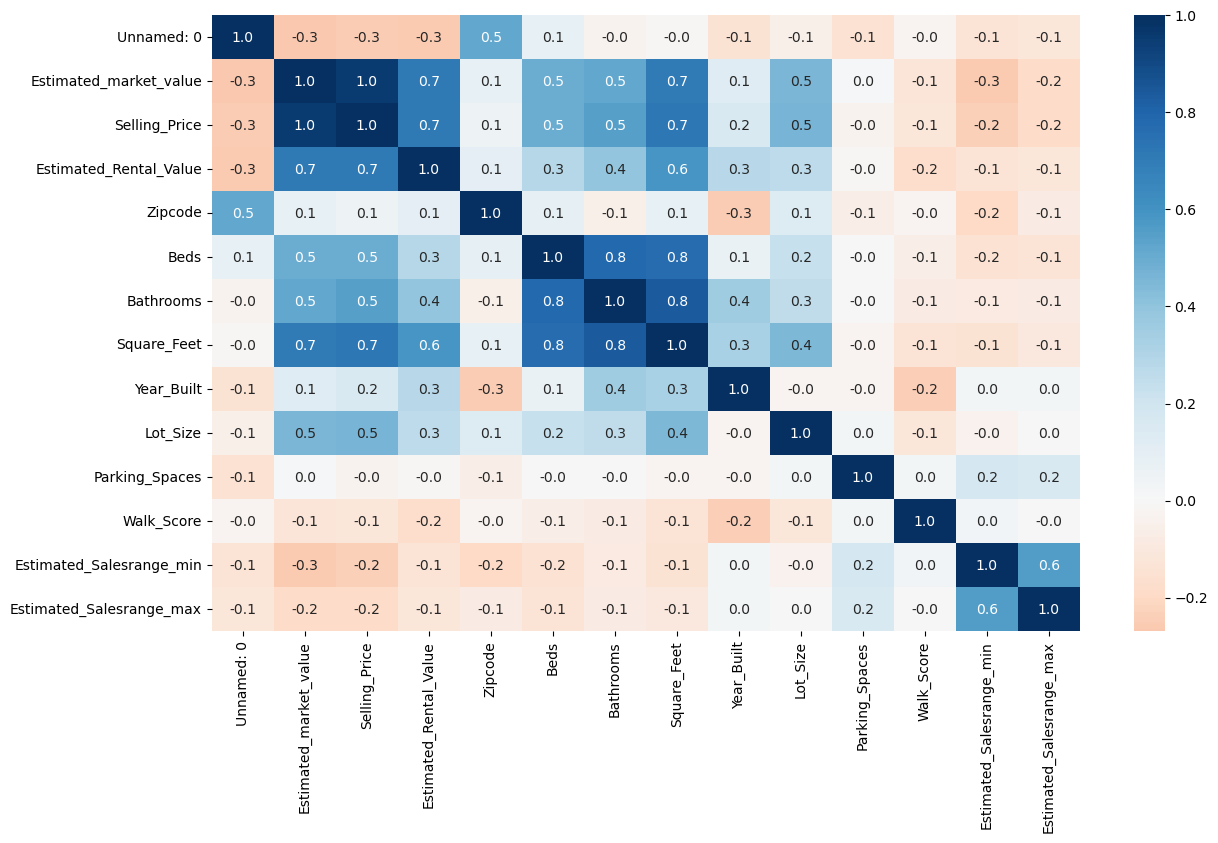

In [103]:
corr = redfin_df.corr() # getting the heatmap to check whether other variables may have an effect on selling price
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()#show heatmap of the dataset

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [14]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN

In [15]:
values = [30]# remove the outlier
redfin_df = redfin_df[redfin_df.Beds.isin(values) == False]
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

786

In [16]:
#Creating the linear regression model
predictors = ['Company_Adj', 'Beds', 'Bathrooms', 'Square_Feet','Year_Built','Lot_Size', 
              'Estimated_market_value','Estimated_Rental_Value','Estimated_Salesrange_min', 'Parking_Spaces',
              'Walk_Score', 'Estimated_Salesrange_max']
outcome = 'Selling_Price'

# partition data
X = pd.get_dummies(redfin_df[predictors], drop_first=True)
y = redfin_df[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)

In [17]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -17784.6514
       Root Mean Squared Error (RMSE) : 234249.5252
            Mean Absolute Error (MAE) : 152556.4885
          Mean Percentage Error (MPE) : -1.7623
Mean Absolute Percentage Error (MAPE) : 8.2442


### Gradient Boosting - XGBoost

In [18]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [20]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN

In [21]:
values = [30]# remove the outlier
redfin_df = redfin_df[redfin_df.Beds.isin(values) == False]
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

786

In [22]:
#Creating the Gradient Boosting model
from sklearn.preprocessing import StandardScaler
predictors = ['Company_Adj', 'Beds', 'Bathrooms', 'Square_Feet','Year_Built','Lot_Size', 
              'Estimated_market_value','Estimated_Rental_Value','Estimated_Salesrange_min', 'Parking_Spaces',
              'Walk_Score', 'Estimated_Salesrange_max']
outcome = 'Selling_Price'

# partition data
X = pd.get_dummies(redfin_df[predictors], drop_first=True)
y = redfin_df[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [23]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -7853.5004
       Root Mean Squared Error (RMSE) : 194375.3299
            Mean Absolute Error (MAE) : 139367.3556
          Mean Percentage Error (MPE) : -1.4410
Mean Absolute Percentage Error (MAPE) : 7.6572


## Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [25]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [26]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN

In [27]:
values = [30]# remove the outlier
redfin_df = redfin_df[redfin_df.Beds.isin(values) == False]
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

786

In [28]:
#Creating the model
predictors = ['Company_Adj', 'Beds', 'Bathrooms', 'Square_Feet','Year_Built','Lot_Size', 
              'Estimated_market_value','Estimated_Rental_Value','Estimated_Salesrange_min', 'Parking_Spaces',
              'Walk_Score', 'Estimated_Salesrange_max']
outcome = 'Selling_Price'

# partition data
X = pd.get_dummies(redfin_df[predictors], drop_first=True)
y = redfin_df[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [29]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -32238.9407
       Root Mean Squared Error (RMSE) : 197636.0884
            Mean Absolute Error (MAE) : 135891.1394
          Mean Percentage Error (MPE) : -2.4072
Mean Absolute Percentage Error (MAPE) : 7.5363


## Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [31]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [32]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN

In [33]:
values = [30]# remove the outlier
redfin_df = redfin_df[redfin_df.Beds.isin(values) == False]
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

786

In [34]:
#Creating the model
predictors = ['Company_Adj', 'Beds', 'Bathrooms', 'Square_Feet','Year_Built','Lot_Size', 
              'Estimated_market_value','Estimated_Rental_Value','Estimated_Salesrange_min', 'Parking_Spaces',
              'Walk_Score', 'Estimated_Salesrange_max']
outcome = 'Selling_Price'

# partition data
X = pd.get_dummies(redfin_df[predictors], drop_first=True)
y = redfin_df[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso_model = Lasso(alpha=0.05, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)

In [35]:
regressionSummary(y_test, lasso_predictions)


Regression statistics

                      Mean Error (ME) : -17784.7230
       Root Mean Squared Error (RMSE) : 234249.4664
            Mean Absolute Error (MAE) : 152556.4234
          Mean Percentage Error (MPE) : -1.7623
Mean Absolute Percentage Error (MAPE) : 8.2441


In [36]:
selected_features = [feature for feature, coefficient in zip(predictors, lasso_model.coef_) if coefficient != 0]
selected_features

['Company_Adj',
 'Beds',
 'Bathrooms',
 'Square_Feet',
 'Year_Built',
 'Lot_Size',
 'Estimated_market_value',
 'Estimated_Rental_Value',
 'Estimated_Salesrange_min',
 'Parking_Spaces',
 'Walk_Score',
 'Estimated_Salesrange_max']

## Ridge Regression

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [38]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [39]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN

In [40]:
values = [30]# remove the outlier
redfin_df = redfin_df[redfin_df.Beds.isin(values) == False]
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

786

In [41]:
#Creating the model
predictors = ['Company_Adj', 'Beds', 'Bathrooms', 'Square_Feet','Year_Built','Lot_Size', 
              'Estimated_market_value','Estimated_Rental_Value','Estimated_Salesrange_min', 'Parking_Spaces',
              'Walk_Score', 'Estimated_Salesrange_max']
outcome = 'Selling_Price'

# partition data
X = pd.get_dummies(redfin_df[predictors], drop_first=True)
y = redfin_df[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=10.0)  
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)

In [42]:
regressionSummary(y_test, ridge_predictions)


Regression statistics

                      Mean Error (ME) : -18447.9923
       Root Mean Squared Error (RMSE) : 231140.2980
            Mean Absolute Error (MAE) : 153246.9471
          Mean Percentage Error (MPE) : -1.9717
Mean Absolute Percentage Error (MAPE) : 8.2916


## Cross Validation

In [43]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [44]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN

In [45]:
values = [30]# remove the outlier
redfin_df = redfin_df[redfin_df.Beds.isin(values) == False]
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

786

In [46]:
predictors = ['Company_Adj', 'Beds', 'Bathrooms', 'Square_Feet','Year_Built','Lot_Size', 
              'Estimated_market_value','Estimated_Rental_Value','Estimated_Salesrange_min', 'Parking_Spaces',
              'Walk_Score', 'Estimated_Salesrange_max']
outcome = 'Selling_Price'

X = pd.get_dummies(redfin_df[predictors], drop_first=True)
y = redfin_df[outcome]

In [47]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Define your regression models
models = [
    LinearRegression(),
    Lasso(alpha=1.0, max_iter=10000),
    Ridge(alpha=10.0),
    RandomForestRegressor(n_estimators=100, random_state=0),
    XGBRegressor(n_estimators=100, objective='reg:squarederror')
]

In [48]:

# Initialize lists to store model names and cross-validation percentage R-squared scores
model_names = []
mean_r2_scores = []

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the feature data
X_scaled = scaler.fit_transform(X)

# Calculate the baseline R-squared (e.g., mean of the target variable)
baseline_r2 = r2_score(y, np.full_like(y, y.mean()))

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each regression model
for model in models:
    # Calculate R-squared scores for the model using cross-validation
    scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='r2')
    
    # Calculate the mean R-squared score
    mean_r2 = scores.mean()
    
    # Get the model name
    model_name = model.__class__.__name__
    model_names.append(model_name)
    
    # Store the mean R-squared score
    mean_r2_scores.append(mean_r2)

# Create a DataFrame
data = {
    'Model': model_names,
    'Mean R-squared (%)': [f'{r2 * 100:.2f}' for r2 in mean_r2_scores],
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

                   Model Mean R-squared (%)
0       LinearRegression              90.53
1                  Lasso              90.53
2                  Ridge              90.53
3  RandomForestRegressor              90.97
4           XGBRegressor              89.96
